# 인공지능개론 1주차 과제

붓꽃 DT, RF, SVM, LR 분류

In [1]:
from google.colab import files
import pandas as pd

# 파일 업로드
uploaded = files.upload()

# 파일명 가져오기
file_name = list(uploaded.keys())[0]

# CSV 파일 읽기 (탭 구분자인 경우 sep='\t' 추가 가능)
df = pd.read_csv(file_name)

# 데이터 확인
print(df.head())


Saving iris.csv to iris.csv
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

# 특성(X)과 라벨(y) 분리
X = df.iloc[:, :-1]  # 마지막 열(Name) 제외
y = df.iloc[:, -1]   # Name 열

# 문자열(Label) -> 숫자로 변환
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# 변환된 라벨 확인
print("라벨 변환 결과:", encoder.classes_)


라벨 변환 결과: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할 (학습: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (SVM과 LR에 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 초기화
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

# 결과 저장용 딕셔너리
results = {}

# 모델 학습 및 평가
for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # 정확도 계산
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} 모델 정확도: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Decision Tree 모델 정확도: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest 모델 정확도: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM 모델 정확도: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94      

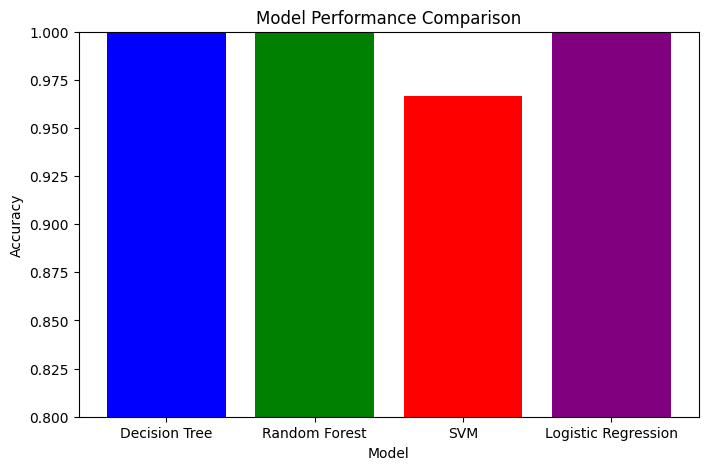

In [6]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)  # 정확도 범위 설정
plt.show()
